# Detecting and Detrending Trends:
  1.	Detecting Trend Using a Hodrick-Prescott Filter
  2.	Detrending a Time Series Trend using the following methods:
  
        - Pandas differencing

        - SciPy signal
        
        - HP filter

## Jay Bhanushali (60009200047)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from statsmodels.tsa.filters.hp_filter import hpfilter
from scipy import signal

import warnings
warnings.filterwarnings("ignore")

## **HP Filter**

### EXINUS

In [2]:
df = pd.read_excel("../Dataset/India_Exchange_Rate_Dataset.xls")

In [3]:
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)

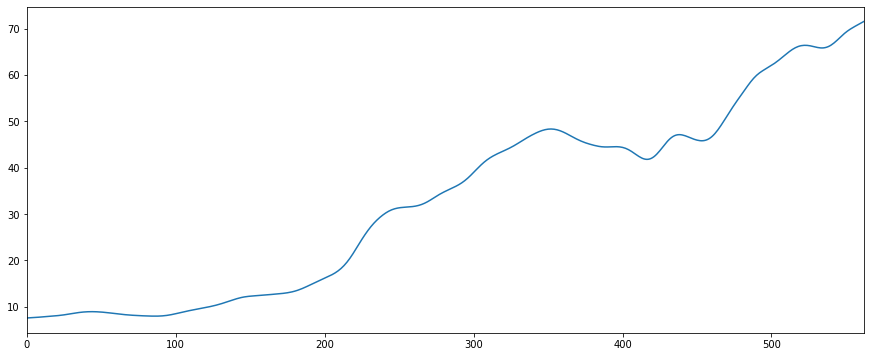

In [4]:
EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

### Shampoo

In [5]:
df2 = pd.read_csv('../Dataset/shampoo.csv', index_col=0,parse_dates=True)

#### Quarterely

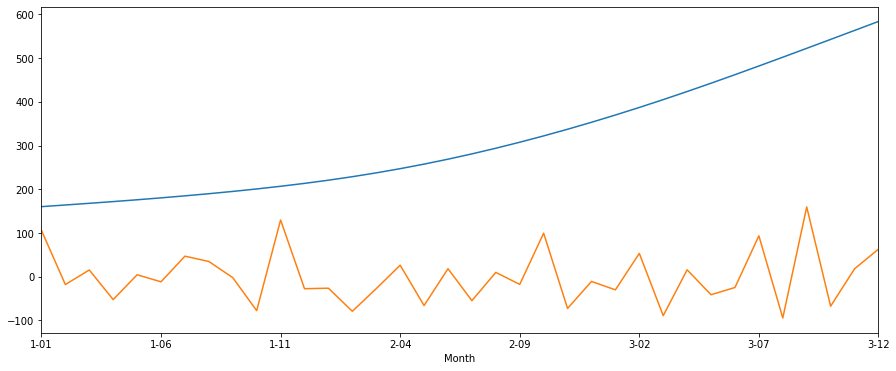

In [6]:
SHAMPOO_cycle,SHAMPOO_trend = hpfilter(df2['Sales'], lamb=1600)
SHAMPOO_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)
SHAMPOO_cycle.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

#### Monthly

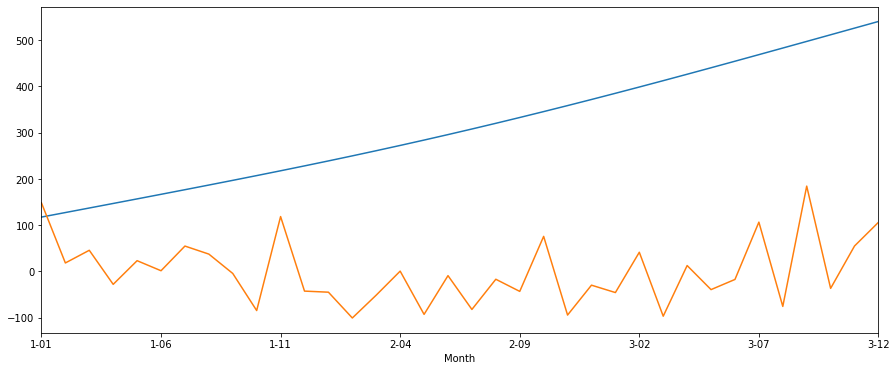

In [7]:
SHAMPOO_cycle,SHAMPOO_trend = hpfilter(df2['Sales'], lamb=14400)
SHAMPOO_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)
SHAMPOO_cycle.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

#### Yearly

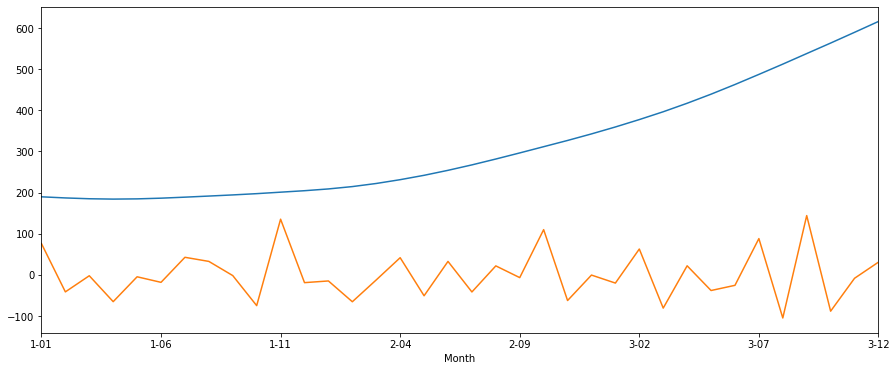

In [8]:
SHAMPOO_cycle,SHAMPOO_trend = hpfilter(df2['Sales'], lamb=100)
SHAMPOO_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)
SHAMPOO_cycle.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

## **Pandas & Scratch**

### **EXINUS**

#### Pandas diff

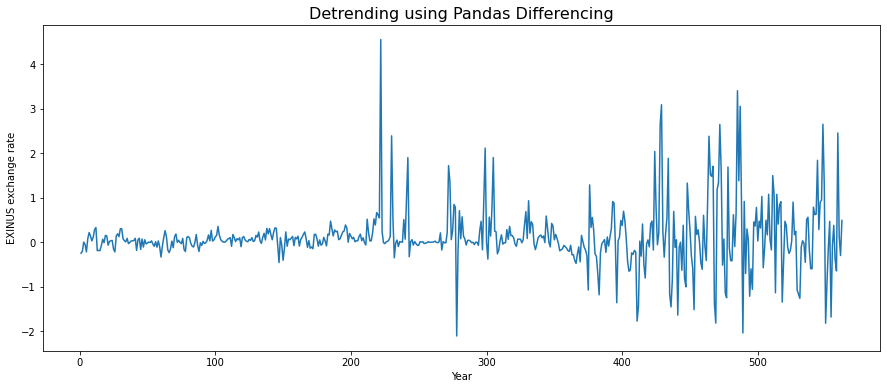

In [9]:
diff = df.EXINUS.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

#### From Scratch

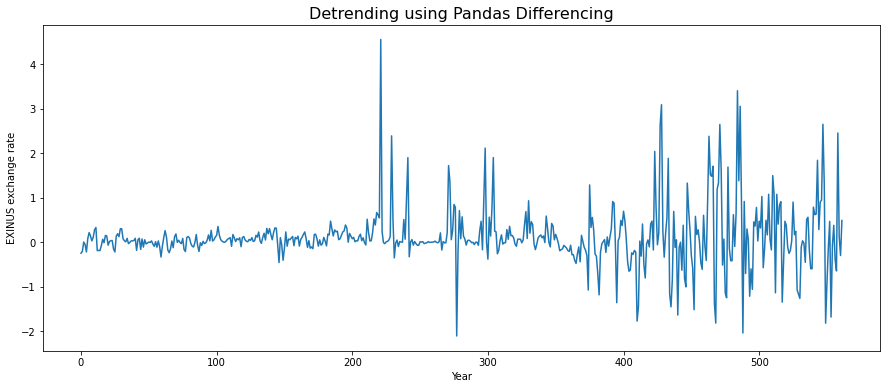

In [10]:
X = df.values
diff = list()
for i in range(1, len(X)):
 value = X[i] - X[i - 1]
 diff.append(value[1])
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

### **Shampoo**

#### Pandas diff

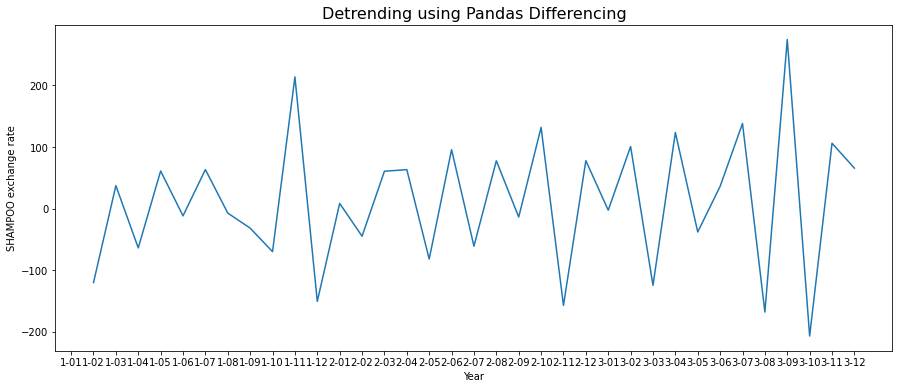

In [11]:
diff = df2.Sales.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('SHAMPOO exchange rate')
plt.show()

#### From Scratch

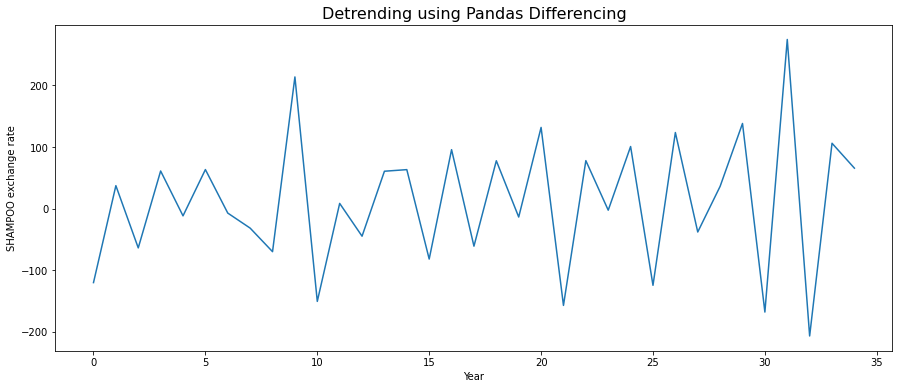

In [12]:
X = df2.values
diff = list()
for i in range(1, len(X)):
 value = X[i] - X[i - 1]
 diff.append(value)
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('SHAMPOO exchange rate')
plt.show()

## **SciPy**

### **EXINUS**

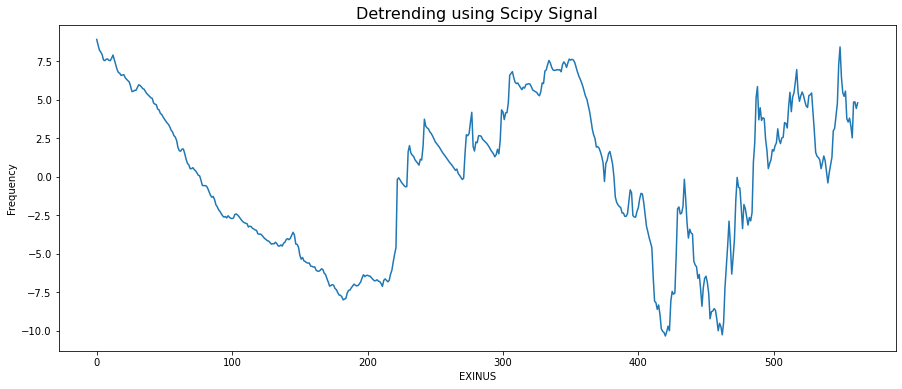

In [13]:
detrended = signal.detrend(df.EXINUS.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

### **SHAMPOO**

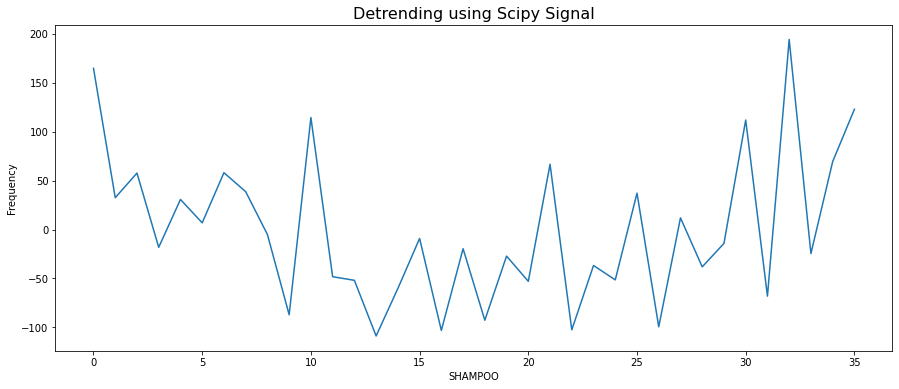

In [14]:
detrended = signal.detrend(df2.Sales.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('SHAMPOO')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

## **HP Filter - Detrending**

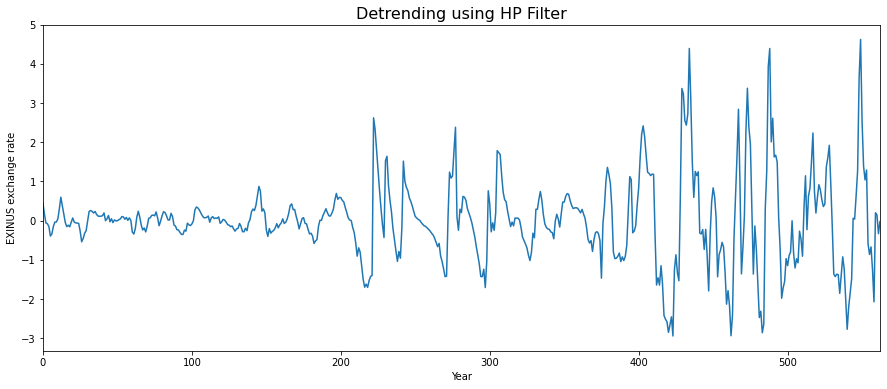

In [15]:
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
df['trend'] = EXINUS_trend
detrended = df.EXINUS - df['trend']
# plt.figure(figsize=(15,6))
# plt.plot(detrended).autoscale(axis='x',tight=True)
detrended.plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

## **Microsoft stock Dataset**

here after MS or ms  means Microsoft

In [16]:
ms = pd.read_csv("../Dataset/Microsoft_Stock.csv")
ms

,Date,Open,High,Low,Close,Volume
0,04-01-2015,40.60,40.76,40.31,40.72,36865322
1,04-02-2015,40.66,40.74,40.12,40.29,37487476
2,04-06-2015,40.34,41.78,40.18,41.55,39223692
3,04-07-2015,41.61,41.91,41.31,41.53,28809375
4,04-08-2015,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021,233.53,233.85,231.10,231.85,24792012


### HP Filter

In [17]:
MS_cycle, MS_trend = hpfilter(ms['Close'], lamb=1600)

#### Detection of trend and cycle

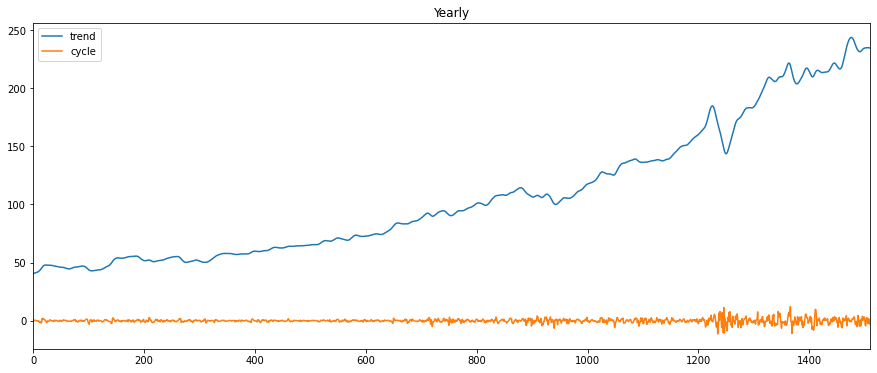

In [18]:
MS_cycle, MS_trend = hpfilter(ms['Close'], lamb=100)
MS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)
MS_cycle.plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title("Yearly")
plt.legend(['trend','cycle'],loc="upper left")
plt.show()

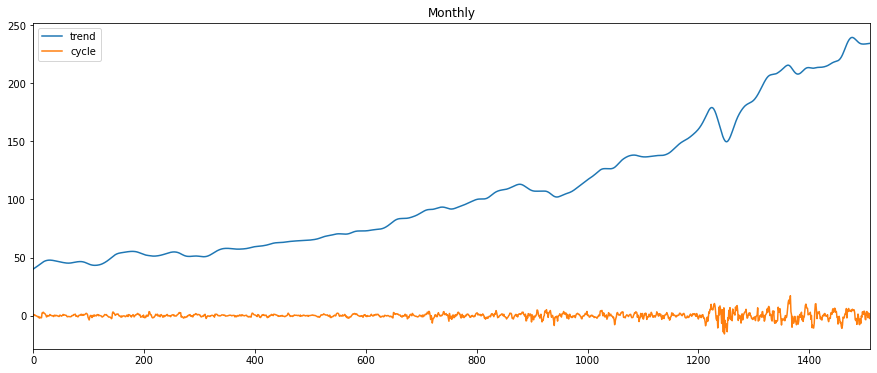

In [19]:
MS_cycle, MS_trend = hpfilter(ms['Close'], lamb=1600)
MS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)
MS_cycle.plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title("Monthly")
plt.legend(['trend','cycle'],loc="upper left")
plt.show()

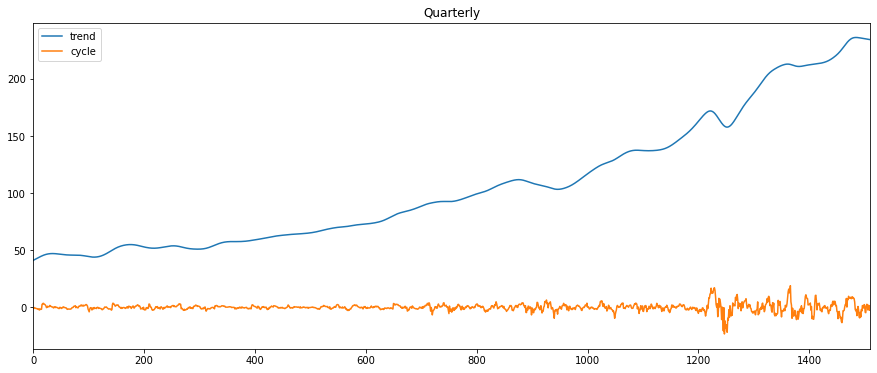

In [20]:
MS_cycle, MS_trend = hpfilter(ms['Close'], lamb=14400)
MS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)
MS_cycle.plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title("Quarterly")
plt.legend(['trend','cycle'],loc="upper left")
plt.show()

### Pandas

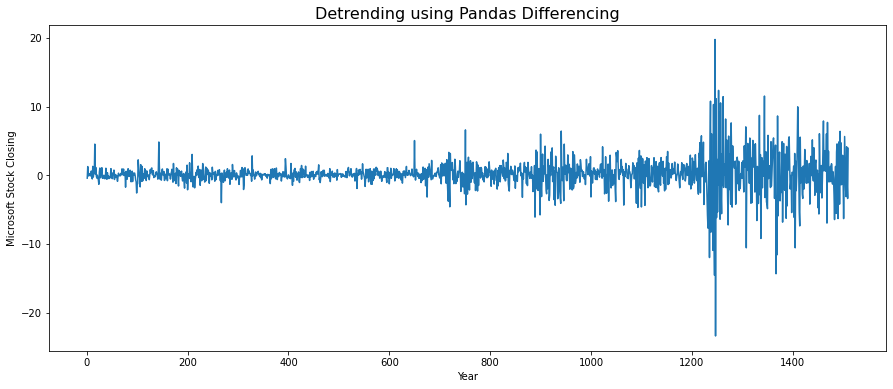

In [21]:
diff = ms.Close.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Microsoft Stock Closing')
plt.show()

### Scratch

In [22]:
ms.values[0]
ms.values[0][4]

40.72

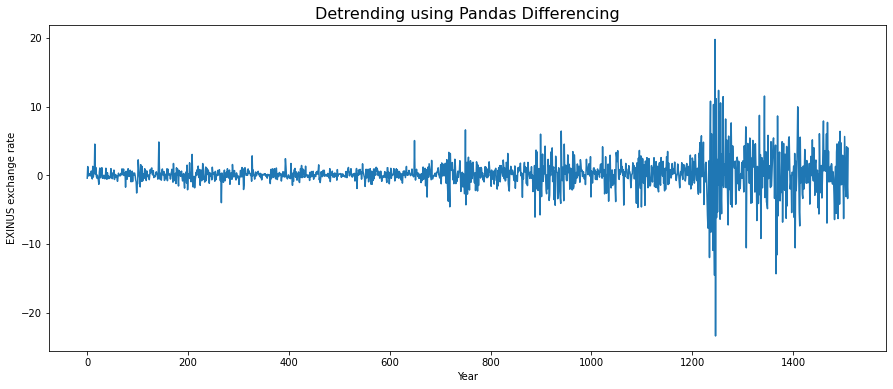

In [23]:
X = ms.values
diff = list()
for i in range(1, len(X)):
 value = X[i][4] - X[i - 1][4]
 diff.append(value)
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

### SciPy

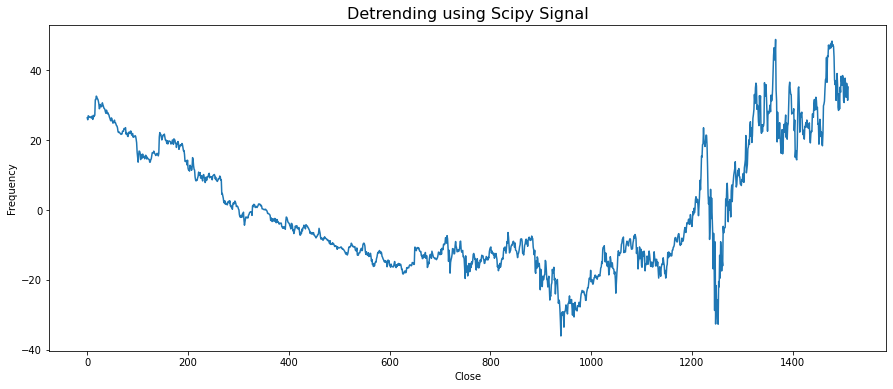

In [24]:
detrended = signal.detrend(ms.Close.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()